In [1]:
from fastai.vision.all import *
import fastai
import timm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import torch
torch.cuda.set_device(3)

In [3]:
df = pd.read_csv('data/wheat_new.csv',decimal=',')

In [4]:
df

,Unnamed: 0,file,DAS,plot nº,photo nº,species,water_treatment,management,plot m2,avg_water (L m-2),...,P (kg microplot-1),K (kg microplot-1),avg_height,GA,GGA,CSI,NGRDIveg,TGIveg,final yield (kg),dataset
0,0,20220517_1 (1).JPG,96,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.959407,0.904393,5.734098,0.1324,2569.2709,9.15,train
1,1,20220517_1 (2).JPG,96,1,(2).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.963030,0.905523,5.971505,0.1316,2648.0105,9.15,train
2,2,20220517_1 (3).JPG,96,1,(3).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.953708,0.898722,5.765430,0.1331,2736.4337,9.15,train
3,3,20220517_1 (4).JPG,96,1,(4).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.957117,0.898772,6.095965,0.1267,2550.8238,9.15,train
4,4,20220602_1 (1).JPG,112,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.892348,0.791199,11.335180,0.1008,1880.2128,9.15,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,20220615_25 (4).JPG,125,25,(4).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.788544,0.323428,58.984136,0.0491,2277.6824,7.95,test
252,252,20220701_25 (1).JPG,141,25,(1).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.031868,0.009072,71.532905,0.0342,946.1760,7.95,test
253,253,20220701_25 (2).JPG,141,25,(2).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.025828,0.006849,73.483356,0.0314,867.4491,7.95,test
254,254,20220701_25 (3).JPG,141,25,(3).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.022065,0.004773,78.367629,0.0196,855.3556,7.95,test


In [5]:
scaler = MinMaxScaler()

In [6]:
df.columns

Index(['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº', 'species',
       'water_treatment', 'management', 'plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)', 'dataset'],
      dtype='object')

In [7]:
dftrain = df[(df.dataset=='train')]
dftrain.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.fit_transform(dftrain[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])
dfvalid = df[(df.dataset=='validation')]
dftest = df[(df.dataset=='test')]
dfvalid.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.transform(dfvalid[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])        
dftest.loc[:,['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']] = scaler.transform(dftest[['plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)']])                   

In [8]:
dftrain = pd.concat([dftrain,dfvalid])

In [9]:
dftrain.loc[:,'dataset'] =  dftrain['dataset'].apply(lambda x: x=='validation')
df.loc[:,'dataset'] =  df['dataset'].apply(lambda x: x=='test')

In [10]:
# dftrain.loc[:,'final yield (kg)'] = dftrain['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))
# df.loc[:,'final yield (kg)'] = df['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))

In [11]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/')],
                 get_y=[ColReader('final yield (kg)')],
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)])
dls = db.dataloaders(dftrain,bs=4)

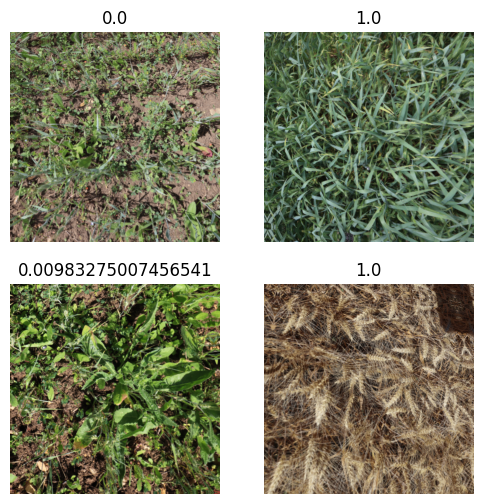

In [12]:
dls.show_batch()

In [13]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='vit_yield_minmax')
]

In [14]:
from fastai.metrics import mae,rmse,mse

In [15]:
learn = Learner(dls, timm.create_model('vit_base_patch16_384',num_classes=1,pretrained=True),
                loss_func=MSELossFlat(), metrics=[mae,rmse,mse],cbs=callbacks).to_fp16()

In [16]:
# learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,1.585155,0.488165,0.683419,0.698688,0.488165,00:23


Better model found at epoch 0 with valid_loss value: 0.4881654381752014.


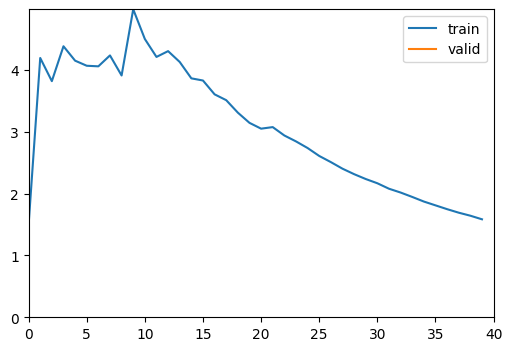

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,0.174539,0.045591,0.179987,0.213521,0.045591,00:29
1,0.068236,0.013687,0.099790,0.116990,0.013687,00:33
2,0.034728,0.007399,0.064895,0.086015,0.007399,00:31
3,0.026064,0.010697,0.084027,0.103427,0.010697,00:30
4,0.027835,0.019336,0.108920,0.139053,0.019336,00:27
5,0.027311,0.012047,0.093542,0.109760,0.012047,00:29
6,0.047873,0.145080,0.363228,0.380893,0.145080,00:33
7,0.040137,0.003356,0.046188,0.057930,0.003356,00:29
8,0.033669,0.117483,0.331883,0.342759,0.117483,00:29
9,0.030920,0.012994,0.102724,0.113989,0.012994,00:26


Better model found at epoch 0 with valid_loss value: 0.045591168105602264.


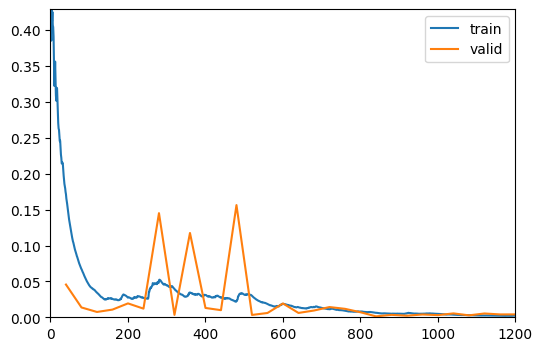

Better model found at epoch 1 with valid_loss value: 0.013686680234968662.
Better model found at epoch 2 with valid_loss value: 0.007398630492389202.
Better model found at epoch 7 with valid_loss value: 0.0033558644354343414.
Better model found at epoch 12 with valid_loss value: 0.0032543137203902006.
Better model found at epoch 20 with valid_loss value: 0.0012862684670835733.


In [17]:
learn.fine_tune(30,base_lr=1e-4)

In [18]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/')],
                 get_y=[ColReader('final yield (kg)')],
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)])
dls = db.dataloaders(df,bs=8)

In [19]:
learn.dls=dls

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
preds,gt = learn.get_preds()

In [22]:
gt

tensor([ 2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,
         2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,  2.4077,
        11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500,
        11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500, 11.3500,
         1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,
         1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,  1.7521,
         7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,
         7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500,  7.9500])

In [23]:
mean_absolute_error(gt,preds*(10.55-0.8579)+0.8579)

0.9515316

In [24]:
mean_squared_error(gt,preds*(10.55-0.8579)+0.8579)

1.3371177

In [25]:
math.sqrt(mean_squared_error(gt,preds*(10.55-0.8579)+0.8579))

1.1563380439847826